## 1. 下載資料集
本資料集包含60000張訓練資料, 10000張測試資料, 每張大小為 28x28

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

# 將資料正規化
def preprocess(x, y):
    x = tf.cast(x, dtype=tf.float32) / 255.
    x = tf.reshape(x, [28, 28, 1])
    y = tf.cast(y, dtype=tf.int32)
    return x, y
batchs = 32

# 下載 mnist datasets
(train_Data, train_Label), (test_Data, test_Label) = mnist.load_data()

print(train_Data.shape)
print(train_Label.shape)

(60000, 28, 28)
(60000,)


In [4]:
# 將訓練資料集做正規化及洗牌
db = tf.data.Dataset.from_tensor_slices((train_Data, train_Label))  # 自陣列建立datasets
db = db.map(preprocess).shuffle(10000).batch(batchs)

# 將測試資料集做正規化
db_test = tf.data.Dataset.from_tensor_slices((test_Data, test_Label))
db_test = db_test.map(preprocess).batch(batchs)

print("Precrocessing done!")

Precrocessing done!


## 2. 建置CNN模型

In [5]:
LeNet5Model = Sequential([
    # 第一個卷積層, 6個 5x5 卷積核, 激勵函數為 relu
    Conv2D(6, kernel_size=5, strides=1, padding='same', activation='relu'),
    # 池化層大小 2x2, 步長 2
    MaxPooling2D(pool_size=2, strides=2),
    # 第二個卷積層, 16個 5x5 卷積核, 激勵函數為 relu
    Conv2D(16, kernel_size=5, strides=1, padding='same', activation='relu'),
    # 池化層大小 2x2, 步長 2
    MaxPooling2D(pool_size=2, strides=2),
    # 攤平, 方便全連接層處理
    Flatten(),
    # 全連接層, 120個 nodes, 激勵函數為 relu
    Dense(120, activation='relu'),
    # 全連接層, 84個 nodes, 激勵函數為 relu
    Dense(84, activation='relu'),
    # 全連接層(輸出), 10個 nodes (10 classes), 最後以機率方式呈現
    Dense(10, activation='softmax')
])

# 指定輸入數據維度
LeNet5Model.build(input_shape=(None, 28, 28, 1))

print(LeNet5Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               94200     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## 3. 編譯模型

In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

LeNet5Model.compile(optimizer=optimizer, 
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

## 4. 訓練模型並追蹤正確率與損失值

In [13]:
history = LeNet5Model.fit(db, epochs=5, validation_data=db_test)

val_acc = history.history['val_accuracy']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
loss = history.history['loss']


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0364 - val_accuracy: 0.9876
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0294 - accuracy: 0.9910 - val_loss: 0.0382 - val_accuracy: 0.9869
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0332 - val_accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0329 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0362 - val_accuracy: 0.9884


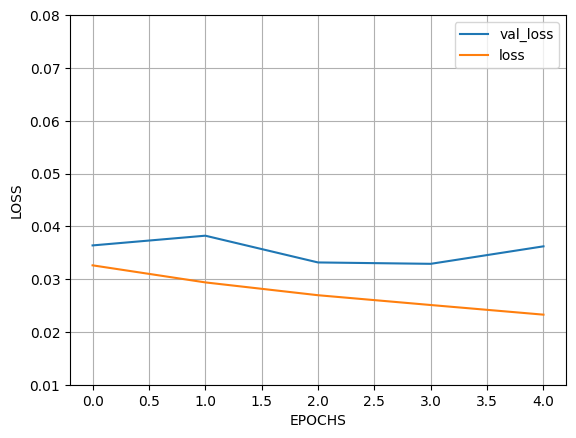

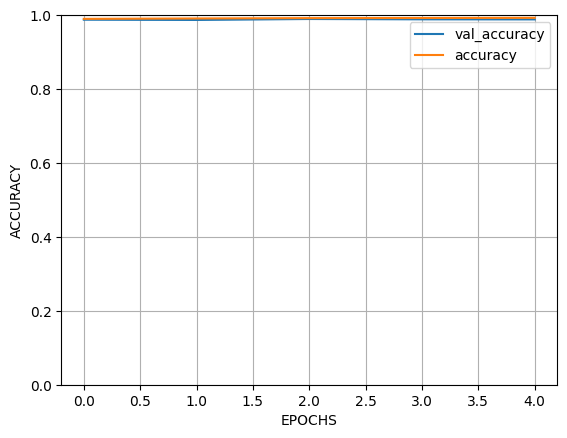

In [16]:
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.plot(np.arange(len(loss)), loss, label='loss')
plt.ylim(0.01, 0.08)
plt.xlabel('EPOCHS')
plt.ylabel('LOSS')
plt.legend()
plt.grid()
plt.show()

plt.plot(np.arange(len(val_acc)), val_acc, label='val_accuracy')
plt.plot(np.arange(len(acc)), acc, label='accuracy')
plt.ylim(0.8, 1.0)
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.grid()
plt.show()